In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report
from test_function import *
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
omit = pd.read_csv("unannotated_omit_std.tsv", sep = "\t")


x_column = ['SIFT_pred','LRT_pred', 'MA_pred', 'PROVEN_pred', 'SLR_score', 'SIFT_score','LRT_omega', 
                'MA_score', 'PROVEN_score', 'Grantham', 'HMMEntropy','HMMRelEntropy', 'PredRSAB', 'PredRSAI', 
                'PredRSAE','PredBFactorF', 'PredBFactorM', 'PredBFactorS', 'PredStabilityH','PredStabilityM', 
                'PredStabilityL', 'PredSSE', 'PredSSH','PredSSC', 'dscore', 'phyloP_pri', 'phyloP_mam','phyloP_ver','RNA_seq','UNEECON']
y_column = 'clinvar_result'

#overall model
y = omit.loc[:,[y_column]].values.flatten()
y = y.flatten()
X = omit.loc[:,x_column]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

## TUNING (using GridSearchCV)
are only able to tune dominant and recessive

In [6]:
tuned_parameters = {"learning_rate" : [0.05,0.1,0.15], 
                   "n_estimators": [150,200],
                    "max_depth": [3,5,8]}

In [7]:
#tunning domi
def data_tun(data, model, tuned_parameters):
    if(data == 'overall'):
        Xtrain, Xtest, ytrain, ytest = X_train, X_test, y_train, y_test
    elif(data == 'domi'):
        Xtrain, Xtest, ytrain, ytest = X_train_domi, X_test_domi, y_train_domi, y_test_domi
    else:
        Xtrain, Xtest, ytrain, ytest = X_train_recess, X_test_recess, y_train_recess, y_test_recess
    tuning(Xtrain, Xtest, ytrain, ytest, model, tuned_parameters)

In [8]:
data_tun('domi','gradient boosting', tuned_parameters)

# Tuning hyper-parameters for recall



/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set found on development set:
{'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 150}
With score : 0.862

Grid scores on development set:

0.853 (+/-0.035) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
0.855 (+/-0.036) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
0.861 (+/-0.027) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150}
0.856 (+/-0.026) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
0.847 (+/-0.011) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 150}
0.848 (+/-0.019) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200}
0.852 (+/-0.027) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
0.858 (+/-0.028) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
0.856 (+/-0.023) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
0.856 (+/-0.021) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
0.855 (+/-0.015) for {'l

In [9]:
#tunning recess
data_tun('recess','gradient boosting', tuned_parameters)

# Tuning hyper-parameters for recall



/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set found on development set:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
With score : 0.873

Grid scores on development set:

0.868 (+/-0.021) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
0.868 (+/-0.019) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
0.867 (+/-0.023) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150}
0.865 (+/-0.023) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
0.863 (+/-0.026) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 150}
0.863 (+/-0.027) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200}
0.873 (+/-0.021) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
0.873 (+/-0.022) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
0.863 (+/-0.019) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
0.862 (+/-0.032) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
0.862 (+/-0.013) for {'le

In [10]:
#tuning overall model
data_tun('overall','gradient boosting', tuned_parameters)

# Tuning hyper-parameters for recall



/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set found on development set:
{'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200}
With score : 0.872

Grid scores on development set:

0.869 (+/-0.005) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
0.869 (+/-0.004) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
0.870 (+/-0.003) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150}
0.871 (+/-0.003) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
0.872 (+/-0.005) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 150}
0.872 (+/-0.004) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200}
0.870 (+/-0.004) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
0.871 (+/-0.005) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
0.871 (+/-0.005) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
0.871 (+/-0.004) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
0.871 (+/-0.004) for {'l

In [3]:
#dominant
# boosting_domi = GradientBoostingClassifier(learning_rate = 0.15, max_depth = 5, n_estimators = 150, subsample = 1)
# boosting_domi.fit(X_train_domi, y_train_domi)
# boosting_domi_pred = boosting_domi.decision_function(X_test_domi)

# #recessive
# boosting_recess = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 3, n_estimators = 150, subsample = 1)
# boosting_recess.fit(X_train_recess, y_train_recess)
# boosting_recess_pred = boosting_recess.decision_function(X_test_recess)

#overall
boosting = GradientBoostingClassifier(learning_rate = 0.05, max_depth = 8, n_estimators = 200, subsample = 1)
boosting.fit(X_train, y_train)
boosting_pred = boosting.decision_function(X_test)

In [4]:
drawROC(y_test_domi, boosting_domi_pred, label = 'dominant')
drawROC(y_test_recess, boosting_recess_pred, label = 'recessive')
drawROC(y_test, boosting_pred, label = 'overall', lastone = True, title = 'Gradient boosting model')

NameError: name 'y_test_domi' is not defined

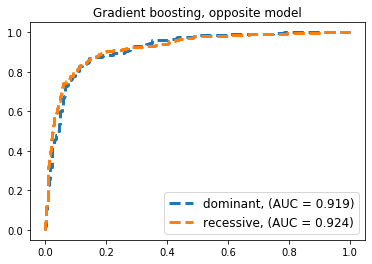

In [9]:
#cross model
domi_crossed = boosting_recess.decision_function(X_test_domi)
recess_crossed = boosting_domi.decision_function(X_test_recess)

drawROC(y_test_domi, domi_crossed, label = 'dominant')
drawROC(y_test_recess, recess_crossed, label = 'recessive', lastone = True, title = 'Gradient boosting, opposite model')

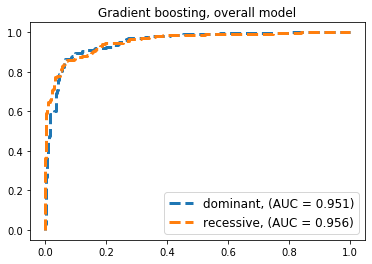

In [10]:
domi_overall = boosting.decision_function(X_test_domi)
recess_overall = boosting.decision_function(X_test_recess)

drawROC(y_test_domi, domi_overall, label = 'dominant')
drawROC(y_test_recess, recess_overall, label = 'recessive', lastone = True, title = 'Gradient boosting, overall model')

In [19]:
domi = pd.DataFrame({'result': y_test_domi, 'self_predict' : boosting_domi_pred, 'cross_predict' : domi_crossed, 'overall_predict':  domi_overall})
domi.to_csv('~/work/project/not_conflict/r_noconflict/domi_gradient.tsv', sep = '\t',index = False)

recess = pd.DataFrame({'result': y_test_recess, 'self_predict' : boosting_recess_pred, 'cross_predict' : recess_crossed, 'overall_predict':  recess_overall})
recess.to_csv('~/work/project/not_conflict/r_noconflict/recess_gradient.tsv', sep = '\t',index = False)


In [3]:
def drawROC2(ytest, ytest_hat, lw=3, linestyle = '--', label = '', lastone = False, MoreThanOnelocation = 'lower right', fontsize = 12, title = '', legendloc = ''):
    fpr, tpr, thresholds = roc_curve(ytest, ytest_hat)
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr, tpr, lw = lw, linestyle = linestyle, label = label + ', (AUC = %0.3f)'%roc_auc)
    if lastone == True:
        if legendloc != '':
            plt.legend(loc='upper center', bbox_to_anchor= (0.0, 1.7), ncol=legendloc, borderaxespad=0, frameon=False)
        else:
            plt.legend(loc = 'lower right', fontsize = 12)
        plt.title(title)
        plt.show()

In [9]:
# individual feature
x_ind_column = ['MA_score', 'Grantham','HMMEntropy','HMMRelEntropy', 'PredRSAI', 'PredSSE','PredStabilityH',
                'PredRSAE', 'dscore', 'phyloP_pri', 'phyloP_mam','phyloP_ver','RNA_seq','UNEECON','SIFT_score',
                'SLR_score', 'LRT_omega','PROVEN_score',  'PredRSAB','PredBFactorF', 'PredBFactorM', 'PredBFactorS', 
                'PredStabilityM', 'PredStabilityL','PredSSH','PredSSC' ]

x_ind_col_neg = ['SIFT_score','SLR_score', 'LRT_omega','PROVEN_score',  'PredRSAB',
                         'PredBFactorF', 'PredBFactorM', 'PredBFactorS', 
                         'PredStabilityM', 'PredStabilityL','PredSSH','PredSSC']




def ind(x_column, data, neg_col):
    pred = {}
    for column in data[x_column]:
        #print(column)
        y_ind = data.loc[:,column]
        #print(y_ind.shape)
        if(column in x_ind_col_neg):
            #print(y_ind)
            #print('negative')
            y_ind = -y_ind
            #print(y_ind)
            #print('')
        pred[column] = y_ind
    return(pred)



In [10]:
ind_col = ind(x_ind_column, omit, x_ind_col_neg)
#print(ind_col)
ind_col2 = pd.DataFrame(ind_col)

NameError: name 'boosting_pred' is not defined

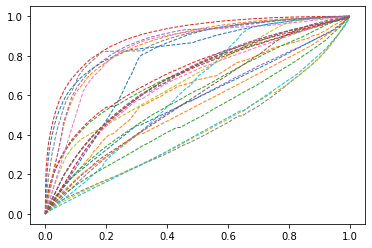

In [11]:
for i in ind_col2:
    drawROC2(omit.loc[:,'clinvar_result'], ind_col2.loc[:,i], lw = 1, label = i)
drawROC2(y_test, boosting_pred, label = 'overall', lastone = True,legendloc = 5, title = 'Gradient boosting individual feature')

In [7]:
# try what showed in logistic regression model

x_ind_neg = ['SLR_score', 'LRT_omega','PROVEN_score','HMMEntropy','PredRSAB','PredBFactorM','PredStabilityL','PredSSH']

ind_col = ind(x_ind_column, omit, x_ind_neg)

ind_col2 = pd.DataFrame(ind_col)

for i in ind_col2:
    drawROC2(omit.loc[:,'clinvar_result'], ind_col2.loc[:,i], lw = 1, label = i)
drawROC2(y_test, boosting_pred, label = 'overall', lastone = True,legendloc = 5, title = 'Gradient boosting individual feature')

NameError: name 'x_ind_column_negative' is not defined

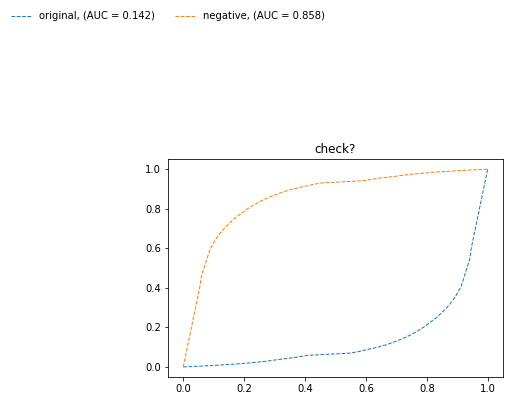

In [204]:
drawROC2(omit.loc[:,'clinvar_result'], omit.loc[:,'SIFT_score'], lw = 1, label = "original")
drawROC2(omit.loc[:,'clinvar_result'], -omit.loc[:,'SIFT_score'], lw = 1, label = "negative", lastone = True,legendloc = 5, title = 'check?')

In [186]:
pred["SIFT_score"]

array([[ 0.56038235],
       [ 0.61121206],
       [-3.50181023],
       ...,
       [ 0.61533364],
       [ 0.60296798],
       [ 0.19290379]])

In [187]:
omit['SIFT_score']

0       -0.560382
1       -0.611212
2        3.501810
3        1.453542
4       -0.288379
           ...   
77675   -0.615334
77676   -0.605029
77677   -0.615334
77678   -0.602968
77679   -0.192904
Name: SIFT_score, Length: 77680, dtype: float64